In [13]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import pde_opt
from pde_opt.model import OptimizationModel
from pde_opt.numerics.equations import CahnHilliardSIFFT
from pde_opt.numerics.solvers import SemiImplicitFourierSpectral
from pde_opt.numerics.domains import Domain
from pde_opt.numerics.functions import (
    DiffusionLegendrePolynomialsWrapper,
    ChemicalPotentialLegendrePolynomialsWrapper,
)

In [14]:
Nx = Ny = 32
Lx = Ly = 0.01 * 32

domain = Domain(
    (Nx, Ny),
    (
        (-Lx / 2, Lx / 2),
        (-Ly / 2, Ly / 2),
    ),
    "dimensionless",
)

In [15]:
opt_model = OptimizationModel(
    equation_type=CahnHilliardSIFFT,
    domain=domain,
    solver_type=SemiImplicitFourierSpectral,
)

In [34]:
tmp = ChemicalPotentialLegendrePolynomialsWrapper(jnp.array([0.0, -3.0, 0.0]))
tmp(jnp.ones((10,10))).shape

(3, 10, 10)

In [29]:
params = {
    "kappa": 0.002,
    "mu": ChemicalPotentialLegendrePolynomialsWrapper(jnp.array([0.0, -3.0])),
    "D": DiffusionLegendrePolynomialsWrapper(jnp.array([0.0])),
}

# params = {"kappa": 0.002, "mu": lambda c: jnp.log(c / (1.0 - c)) + 3.0 * (1.0 - 2.0 * c), "D": lambda c: (1.0 - c) * c}

solver_params = {'A': 0.5}

key = jax.random.PRNGKey(0)
y0 = jnp.clip(0.01 * jax.random.normal(key, (Nx, Ny)) + 0.5, 0.0, 1.0)
ts = jnp.linspace(0.0, 0.2, 100)
print(y0.shape)

(32, 32)


In [30]:
sol = opt_model.solve(params, y0, ts, solver_params, dt0=0.000001, max_steps=1000000)

ValueError: Terms are not compatible with solver! Got:
ODETerm(
  vector_field=<PjitFunction of <function OptimizationModel.solve.<locals>.<lambda> at 0x14ff90c31990>>
)
but expected:
diffrax.ODETerm
Note that terms are checked recursively: if you scroll up you may find a root-cause error that is more specific.

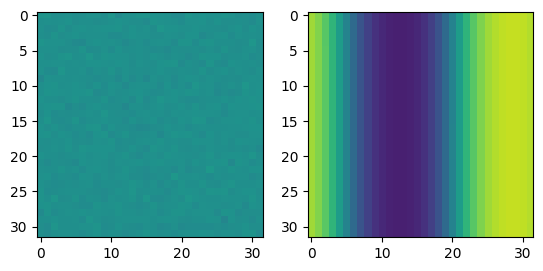

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(sol[0], vmin=0.0, vmax=1.0)
ax[1].imshow(sol[-1], vmin=0.0, vmax=1.0)
plt.show()